# Analysis of bike sharing demands in Seoul 



## Introduction 

This project focuses on analyzing the factors influencing bike rentals for a bike-sharing company. Specifically, we aim to investigate whether temperature has a significant impact on the number of bikes rented. The dataset contains information from the years 2017 and 2018, including various variables such as daily temperature, weather conditions, and historical bike rental data. 
Our goal is to use this data to build a predictive model that can estimate the number of bikes that will be rented for each month. The model will help the company optimize bike availability and manage resources more efficiently based on temperature forecasts and other environmental factors

The dataset contains the count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. Each coloumn in “SeoulBikeData.csv” have the following description:

    Date : the date of the day
    Rented Bike Count : number of rented bike
    Hour : the time in hour 
    Temperature(°C) : the temperature at this time 
    Humidity(%) : the pourcentage of humidity at this time
    Wind speed (m/s) : the wind speed in m/s at this time
    Visibility (10m) : the visibility per 10m at this time
    Dew point temperature(°C) : the dew point temperature of day 
    Solar Radiation (MJ/m2) : the solar radiation in MJ/m2 at this time
    Rainfall(mm) : the rain in mm at this time
    Snowfall (cm) : the snowfalls in cm at this time
    Seasons : the season of the day
    Holiday : if the day is in holiday or not
    Functioning Day : 




## Business Understanding 

The city of Seoul is well organized for bikes, like cites in Danmark, and there is a good organistton for renting bikes. As so, the bikes renting data, from a company,  have been collected and put in a database called “SeoulBikeData.csv”. With those data you can know the number of rented bike every hour from 2017 to 2019. The dataset allow us to see the cycles of bike renting every year. In fact, with those data the companies might want to forecast the bike renting, compared to the weather conditions,the day or the season. 
The purpuse of the project will be to design a model that could help the bike companies to deal with the bike stock with the wether forcast and the period. 
The following research question (RQ) havebeen formulated:

**"Determine the optimum number of bikes needed each time of day based on hour, temperature and solar radiation."**




## Data collection

The dataset that we use is from UC Irvine Machine Learning repository. It is composed of 14 columns (the features) and 8760 rows (the data). We choose this dataset because it can be useful in real life for real business and to see if its possible to forecast the number of rented bike. 
First in this part we are going to see how is the dataset and which feature are useful.

### The Library
Libraries are crucial for expanding Python’s capabilities, improving eﬀiciency, and offering solutions for a broad spectrum of tasks. To get started, it’s necessary to import the required libraries

In [355]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

import statsmodels.api as sm # implements several commonly used regression methods
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import LeaveOneOut, cross_val_score
#from ISLP import load_data
#from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
plt.style.use('fivethirtyeight') 

In [357]:
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')

pandas library enable to managing and preparing the data.
numpy library contribute to handling numerical operations.
matplotlib library contribute to better data visualization.
seaborn library is employed to create visualizations of statistical data.
sklearn library is employed for machine learning and modelling.

## Data Cleaning and Data Preparation


After introducing the different libraries to the program it is possible to import the single dataset at disposal.
The dataset has 8760 rows and 14 columns, the latter referred to as many features.

Data cleaning and data manipulation are necessary steps before take a closer look at the data

Further data cleaning and exploration are shown as to separate steps. In some cases exploration needs to happen while doing data cleaning because it can become an iterative process. Data cleaning is a fundamental step in any data science and machine learning project. It involves the identification and adjustment of data quality issues, which can significantly impact the accuracy and reliability of subsequent analyses and models development.




In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [362]:
df.shape

(8760, 14)

In [364]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [366]:
df.duplicated().sum()

0

Through this line is possible to see that the dataset doesn't contain any categorical data for each feature analyzed.

Furtherome the inevstigation of duplicates led to the conclusion that duplicated cells nor values are included in the original dataframe.
As a conclusion number of rows and columns have remained the same.

Missing data can arise for various reasons, such as incomplete records or data entry errors. By examining these columns, a deeper understanding is gained of the dataset’s characteristics. A identification of which columns have missing values and assess whether these gaps can be filled with reasonable imputations.
In our specific case no missing values were reported.



In [369]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## Data Manipulation

Data manipulation can be crucial in order to make data exploration phase easier.
In our case, the main temporal feature was the days of the year. To simplify data analysis and exploration, additional features were created, including days of the week, months, and seasons of the year.
As a result, three new columns—and therefore three new features—were added to the existing 14 features in the database, bringing the total to 17 features.

In [372]:
df.columns = df.columns.str.replace(r"\s*\(.*?\)\s*", "", regex=True)
df.columns = df.columns.str.replace(" ", "_", regex=False)

In [374]:
df.columns = [x.lower() for x in df.columns]

In [376]:
df["date"] = pd.to_datetime(df["date"], dayfirst = True)
df["day"] = df['date'].dt.day
df["month"] = df['date'].dt.month
df["year"] = df['date'].dt.year
df["weekday"] = df['date'].dt.day_name()

In [378]:
df['seasons'] = df['seasons'].map({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3})
df['holiday'] = df['holiday'].map({"No Holiday": 0, "Holiday": 1})
df['weekday'] = df['weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7})

In [380]:
df=df.drop(['functioning_day'], axis = 1)

## Heat Map
In the following section, the heat map is introduced in order to discover correlations between the numerical features
The heat map shows that there is a correlation between some features:
The main feature to analyze "rented bike count" shows acceptable and relevant level of correlations with seasonality, temperature, dew point temperature (referred to the temperature at which the external air became dry --> strictly linked to humidity).


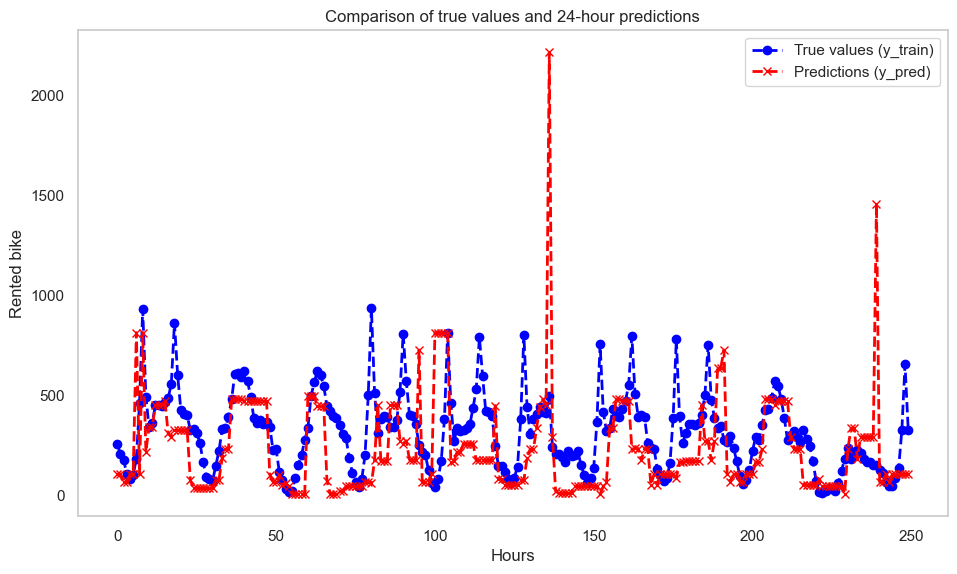

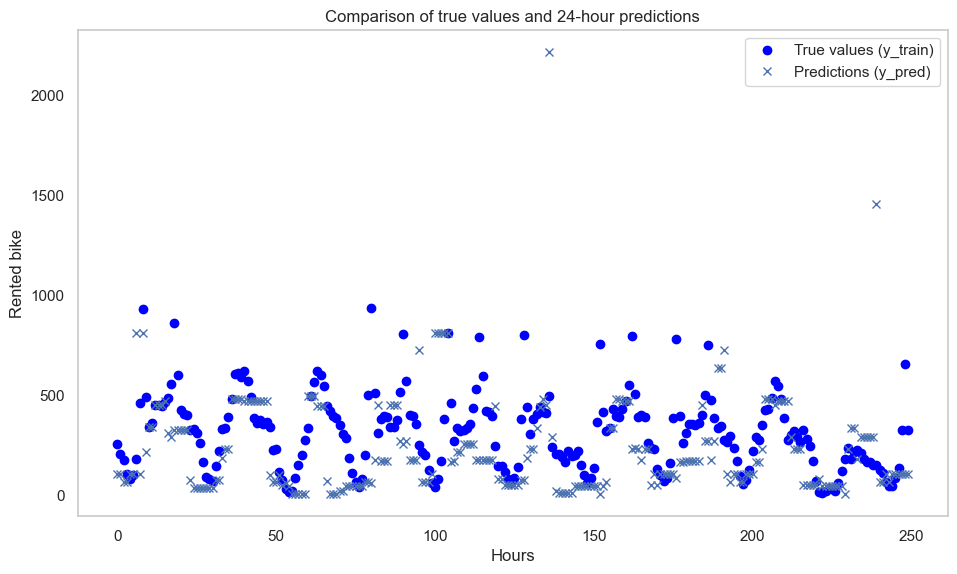

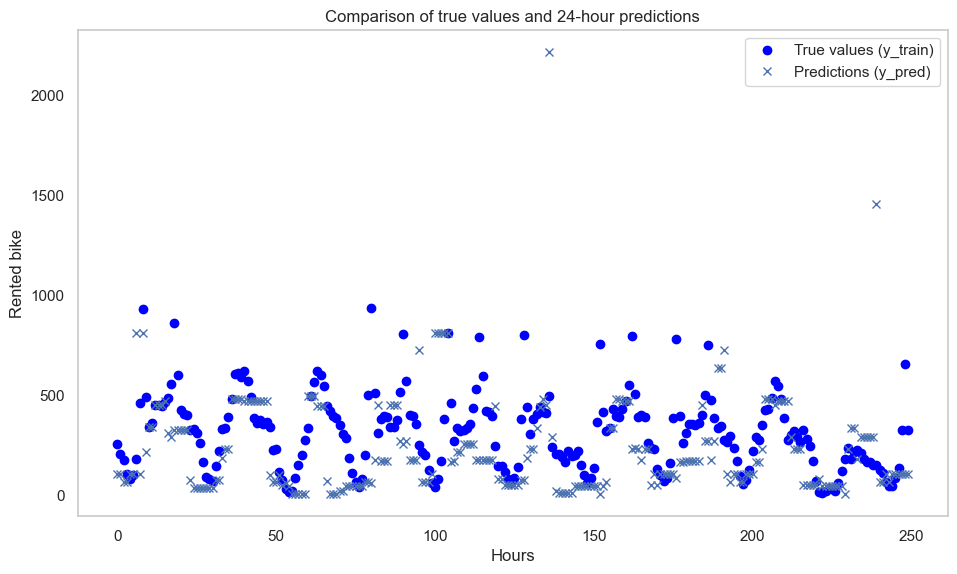

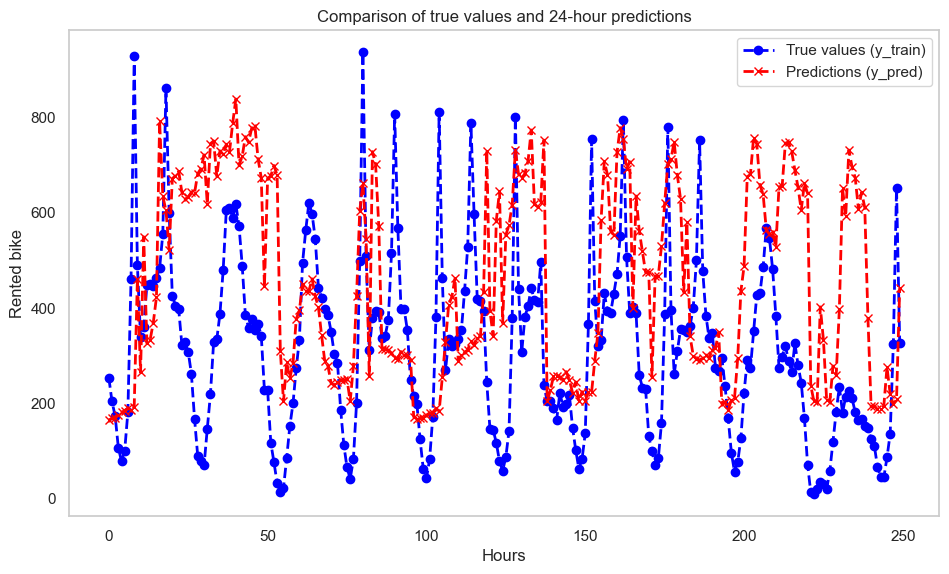

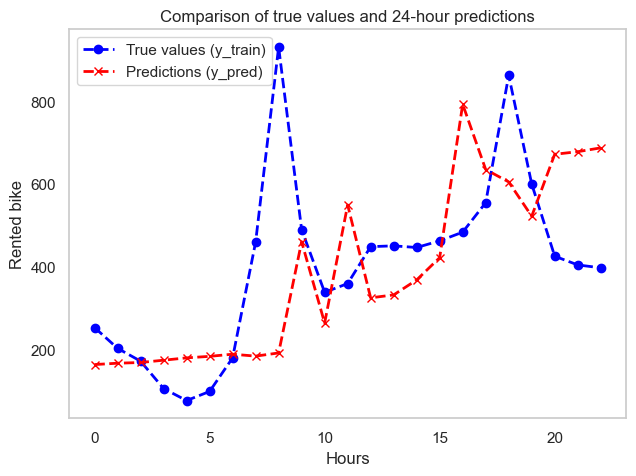

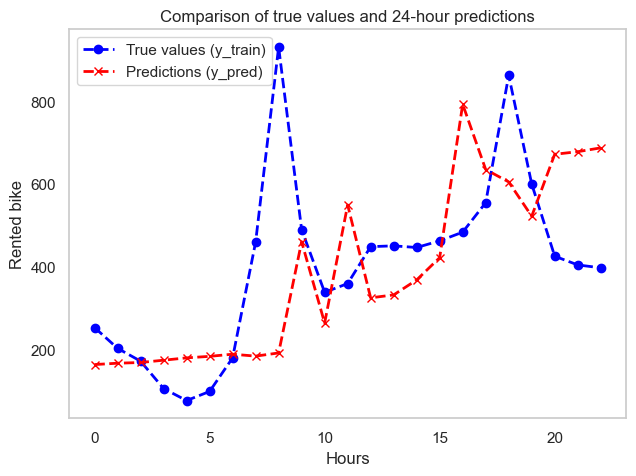

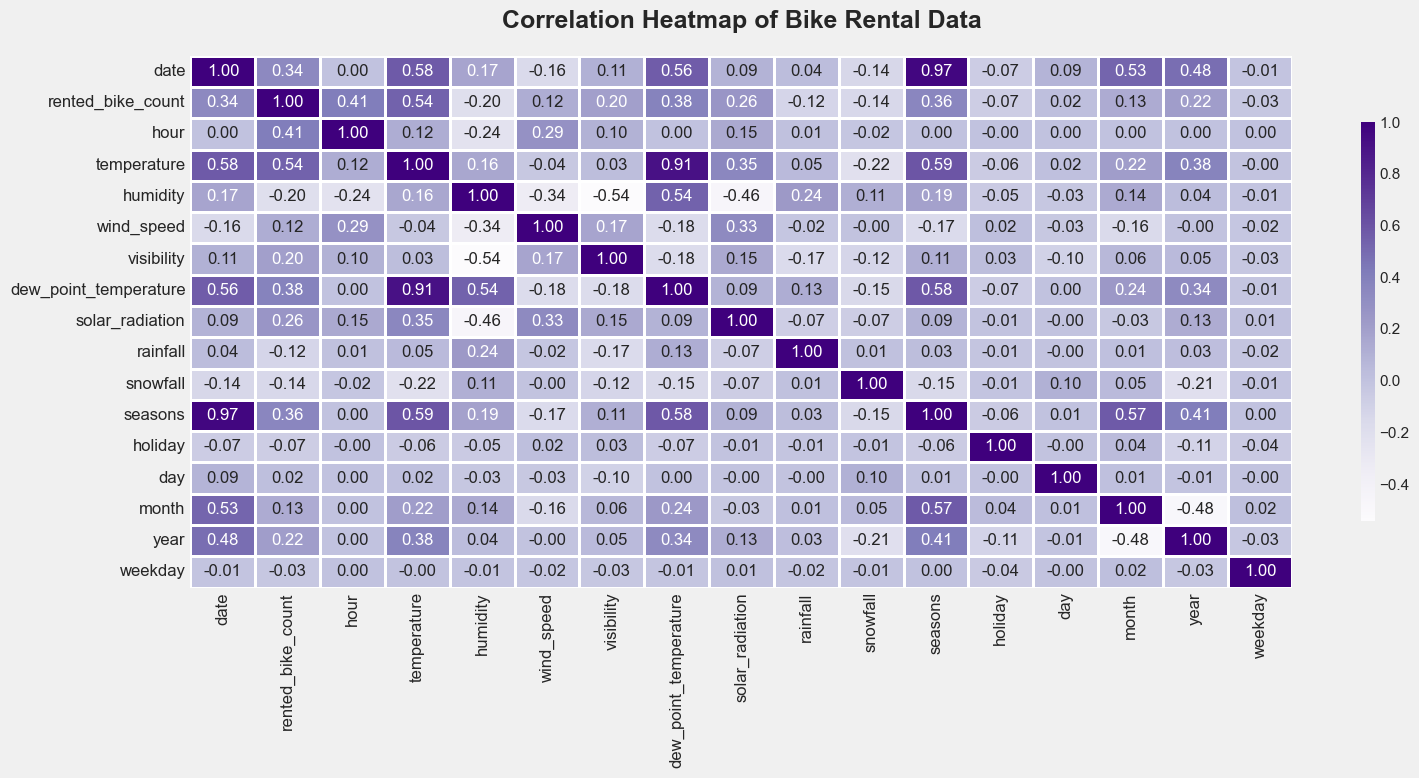

In [383]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(df.corr(), 
            annot=True, 
            fmt='1.2f', 
            annot_kws={'size': 12},
            linewidths=1, 
            linecolor='white',
            cmap='Purples',
            cbar_kws={"shrink": 0.75, "aspect": 30})

plt.title('Correlation Heatmap of Bike Rental Data', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.tight_layout()

plt.show()

## Data Exploration

In this section, we conduct a thorough exploration of the dataset, employing visualization techniques and examining correlations between features to gain a deeper understanding.


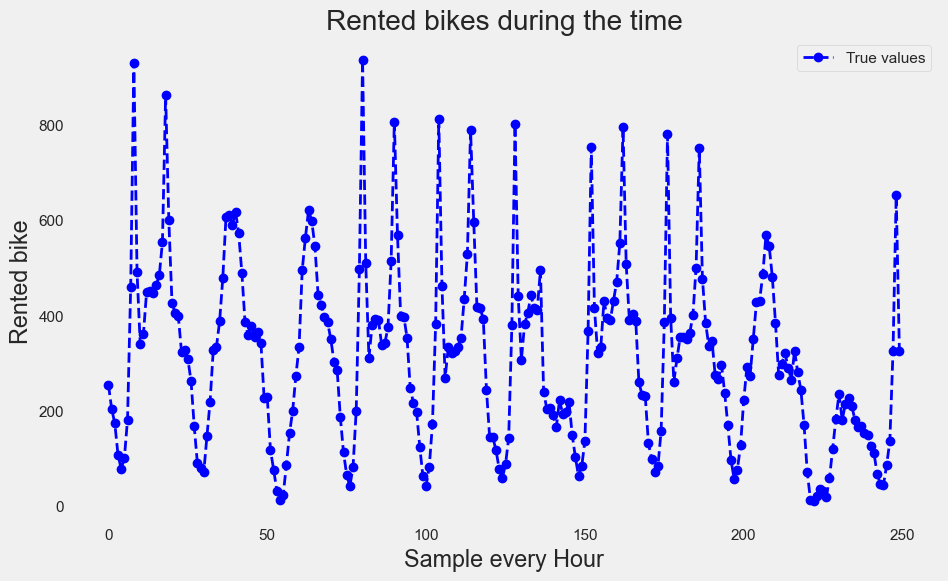

In [386]:
y= df['rented_bike_count']
# Tracer les valeurs
plt.figure(figsize=(10, 6))
plt.plot(y[0:250], 'o', label='True values', color='blue',linestyle='dashed',linewidth=2)

# Ajouter des légendes et des détails
plt.title('Rented bikes during the time')
plt.xlabel('Sample every Hour')
plt.ylabel('Rented bike')
plt.legend()
plt.grid()
plt.show()

This graph shows the number of bikes rented over time. Sampling is done every hour. The data used is the actual data from the dataset to see the apparent trend. We can clearly see a daily or even weekly trend. 
On working days, we can see peaks in bike hire when people are going to and from work. We can also see that these peaks disappear at the weekend.  Typically, however, we can see that despite the apparent trends, rentals vary a great deal and therefore depend not only on the day but also on other external parameters such as the weather. All the data collected will allow us to understand and model these trends but also to predict the number of bikes rented according to external parameters.

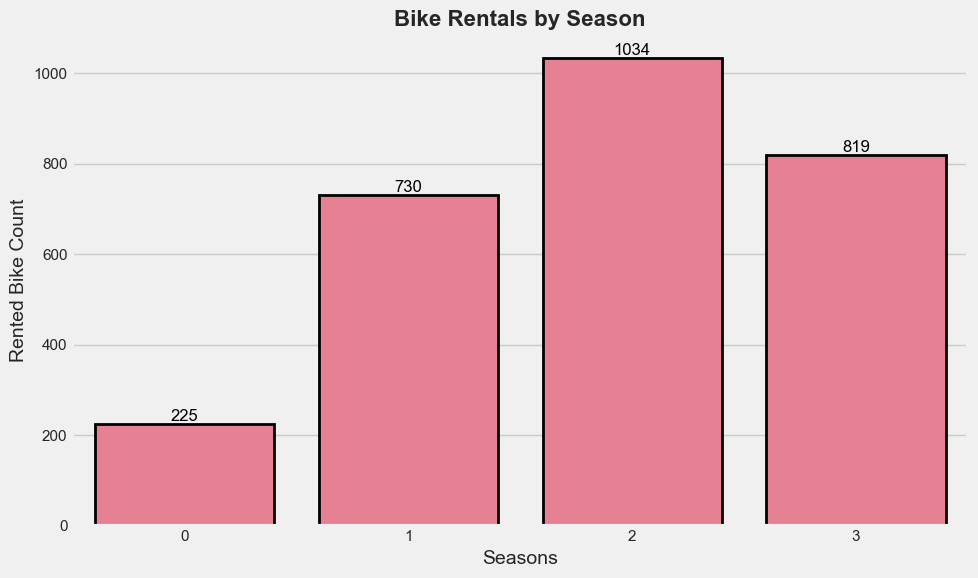

In [389]:
plt.figure(figsize=(10, 6))
sns.set_palette("husl")

ax = sns.barplot(x="seasons", y="rented_bike_count", data=df, errorbar=None)

plt.title("Bike Rentals by Season", fontsize=16, fontweight='bold')
plt.xlabel("Seasons", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

Starting from visualization of The number of bike rented per season through years
and then breakdown the same variables per month and by hour of the day, thus is displayed that mainly during summer and autumn the peak of rented bike is reached due to favourable weather conditions as confirmed by plot referred to bike rentals by month, highlighting that starting from May until October  (peak in June) rental bike services are exploited.


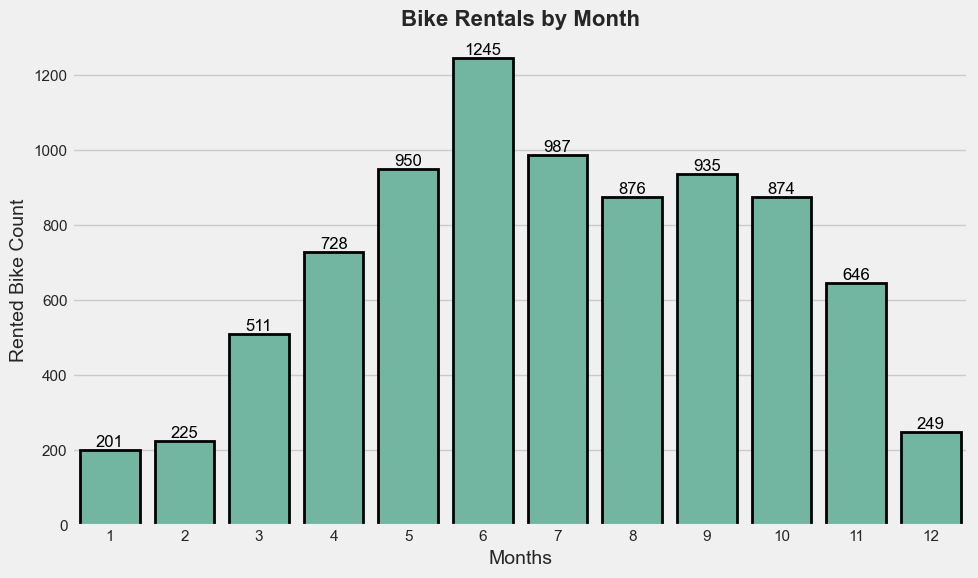

In [392]:
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")

ax = sns.barplot(x="month", y="rented_bike_count", data=df, errorbar=None)

plt.title("Bike Rentals by Month", fontsize=16, fontweight='bold')
plt.xlabel("Months", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

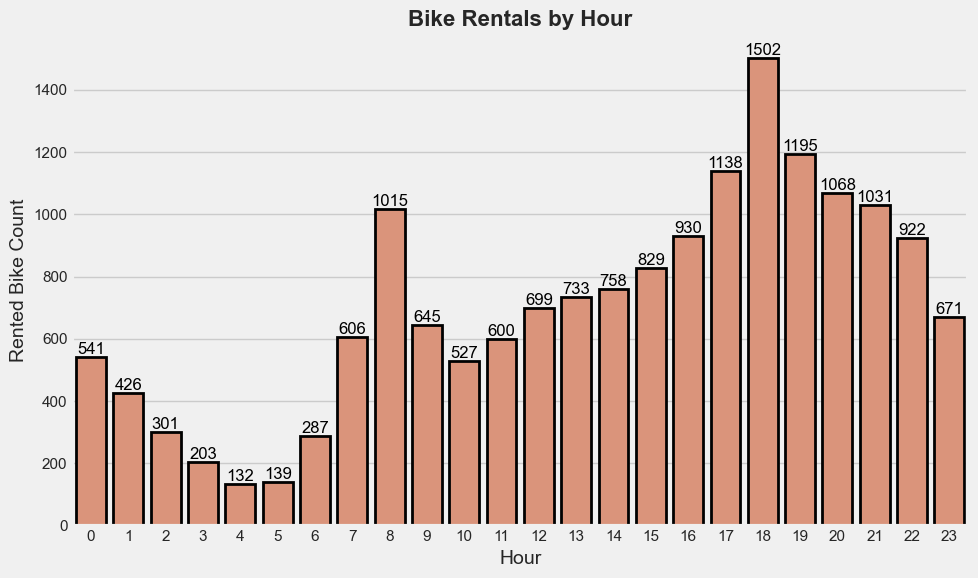

In [394]:
plt.figure(figsize=(10, 6))
sns.set_palette("flare")

ax = sns.barplot(x="hour", y="rented_bike_count", data=df, errorbar=None)

plt.title("Bike Rentals by Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

While the rented bike per hour can help understand the most likely reasons are for commuting home and work and hang out/ moving around the city during evening/dinner/after dinner.

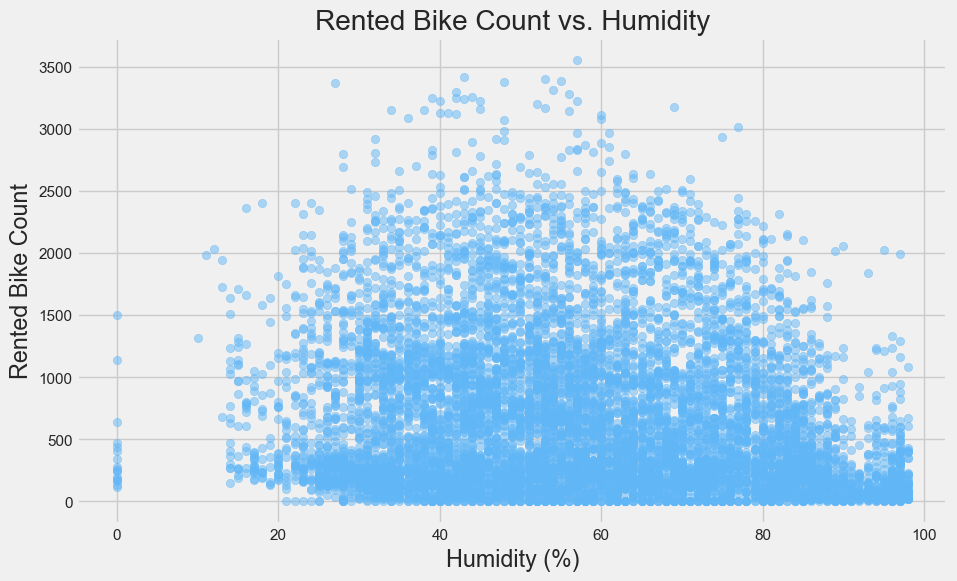

In [397]:
plt.figure(figsize=(10, 6))
plt.scatter(df['humidity'], df['rented_bike_count'], c="#61b7f7", alpha=0.5)
plt.title('Rented Bike Count vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

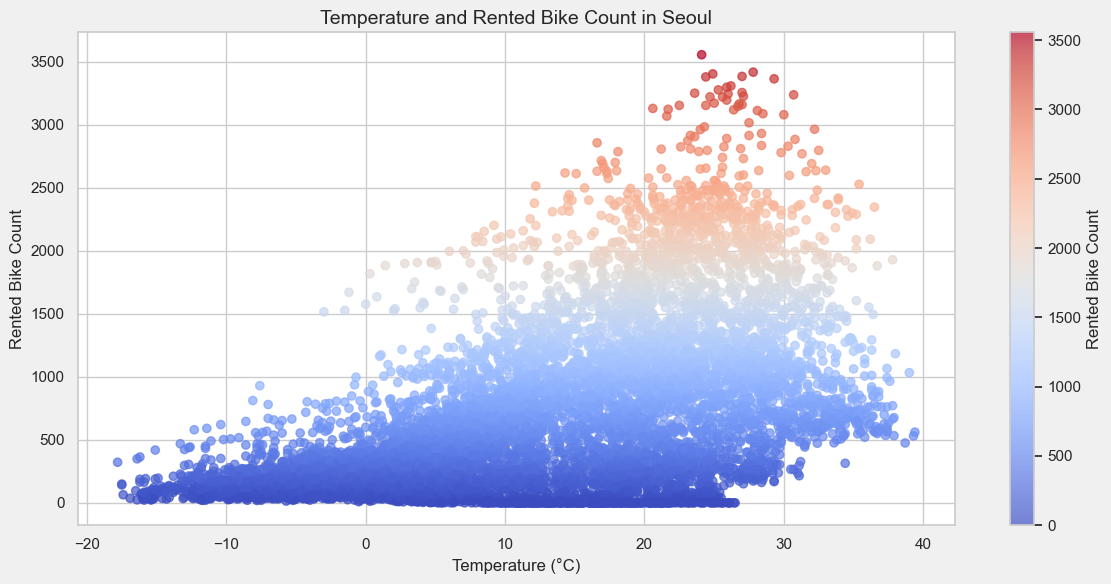

In [399]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

scatter = plt.scatter(x=df['temperature'], y=df['rented_bike_count'], 
                      c=df['rented_bike_count'], cmap='coolwarm', alpha=0.7)

plt.title('Temperature and Rented Bike Count in Seoul', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

plt.colorbar(scatter, label='Rented Bike Count')

plt.tight_layout()
plt.show()

## SIMPLE REGRESSION
### Ralation between the temperature and the Rented bikes

In this part we wanted to see the regression of the rented bikes and only the temperature as a parameter. The method we is already in the seaborn library and it will put the linear regression of the rented bike with temperature. 

Text(0, 0.5, 'Rented Bike Count')

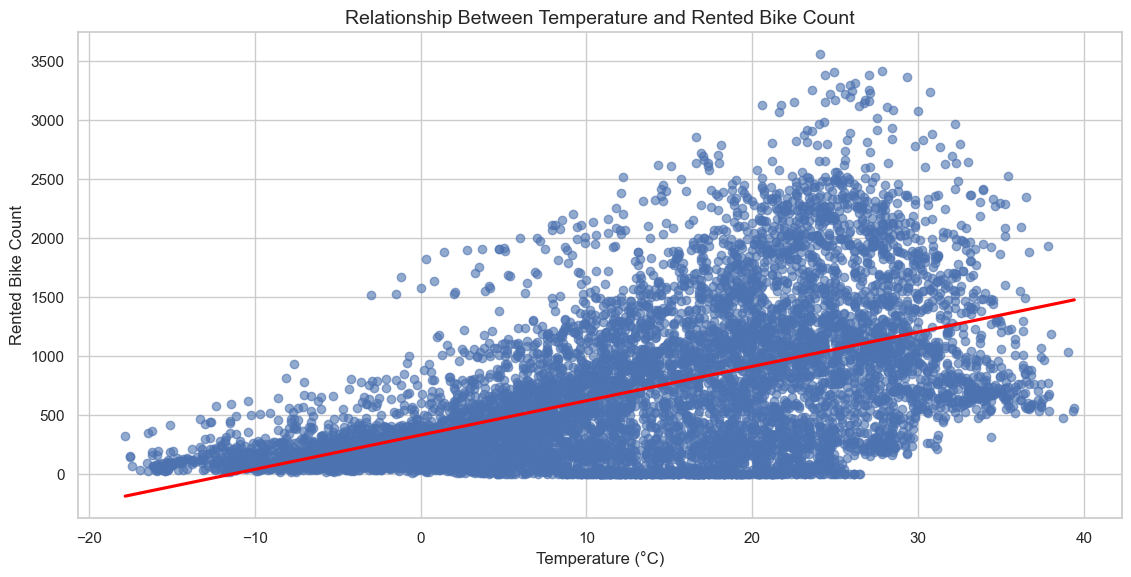

In [402]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Regression plot
sns.regplot(
    x=df['temperature'], y=df['rented_bike_count'],
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None
)

# Add title and labels
plt.title('Relationship Between Temperature and Rented Bike Count', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

In [404]:
# Define the data frame
X = pd.DataFrame({'intercept': np.ones(df.shape[0]), 'temperature': df['temperature']})
X[:5]

,intercept,temperature
0,1.0,-5.2
1,1.0,-5.5
2,1.0,-6.0
3,1.0,-6.2
4,1.0,-6.0


In [406]:
y= df['rented_bike_count']
model = sm.OLS(y,X) # does not fit the model, but specifies it 
results = model.fit()

In [408]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      rented_bike_count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:45:58   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept     329.9525      8.541     38.631      0.000     313.210     346.695
temperature    29.0811      0.486     59.816      0.000      28.128      30.034
==============================================================================
Omnibus:                      954.681   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.965
Skew:                           0.817   Prob(JB):                    1.68e-309
Kurtosis:                       4.108   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [410]:
new_df = pd.DataFrame({'intercept': np.ones(3), 'temperature': [1,6,-9]})
new_df

,intercept,temperature
0,1.0,1
1,1.0,6
2,1.0,-9


In [412]:
new_predictions = results.get_prediction(new_df)

In [414]:
new_predictions.predicted_mean

array([359.03361294, 504.43910789,  68.22262305])

In [416]:
# Produce confidence intervals for the predicted values:
new_predictions.conf_int(alpha=0.05)

array([[342.97691266, 375.09031322],
       [491.30143052, 517.57678526],
       [ 44.46360153,  91.98164457]])

In [418]:
# Prediction intervals are computed by setting obs=True:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[-706.47185251, 1424.53907839],
       [-561.02636685, 1569.90458262],
       [-997.42674254, 1133.87198864]])

In [420]:
def abline(ax, b, m): # defining the function 
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0] +b, m*xlim[1] +b]
    ax.plot(xlim, ylim)

In [422]:
# Including additional arguments: *args allows a number of non-named arguments to abline
def abline(ax,b,m, *args, **kwargs): # **kwards allows any number of named arguments, e.g., linewith=3 to abiline
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m *xlim[0]+b,m*xlim[1]+b]
    ax.plot(xlim, ylim, *args, **kwargs)

/var/folders/69/kzzcl7dd3rq2h3686msf07940000gn/T/ipykernel_1720/615515267.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/var/folders/69/kzzcl7dd3rq2h3686msf07940000gn/T/ipykernel_1720/615515267.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


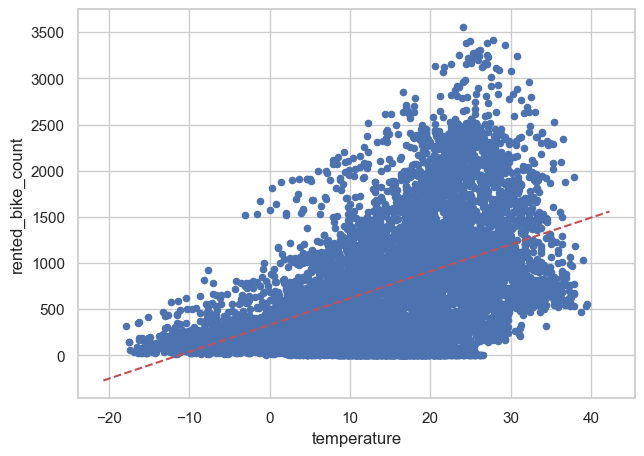

In [424]:
# Let's use the new function and add the regression line to the plot of medv vs. lstat:
ax = df.plot.scatter('temperature', 'rented_bike_count')
abline(ax,
      results.params[0],
      results.params[1],
      'r--')#, # produces a red dashed line
      #linewith=3) # should define the line width

On the graph, we can see that the temperature is not the realy linear other parameters have to be in the regression to have something more precise, because we have to much uncertainity to forecast the number of rented bike.

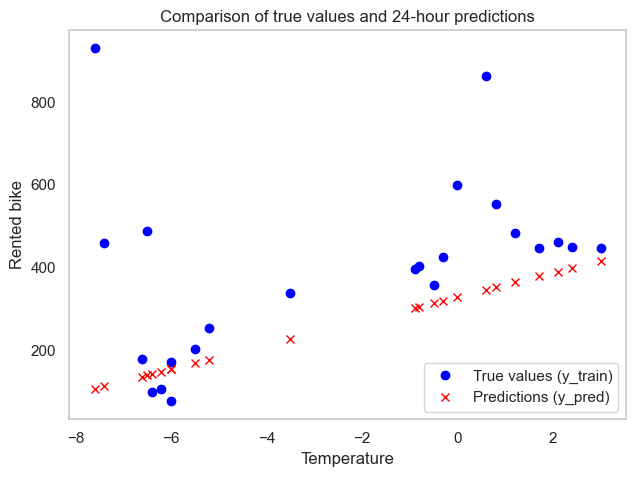

In [427]:
y_pred_1 = results.get_prediction(X)

# Tracer les valeurs
plt.figure()
plt.plot(X['temperature'][0:23], y[0:23], 'o', label='True values (y_train)', color='blue') #,linestyle='dashed',linewidth=2)
plt.plot(X['temperature'][0:23], y_pred_1.predicted_mean[0:23], 'x', label='Predictions (y_pred)', color='red')

# Ajouter des légendes et des détails
plt.title('Comparison of true values and 24-hour predictions')
plt.xlabel('Temperature')
plt.ylabel('Rented bike')
plt.legend()
plt.grid()
plt.show()

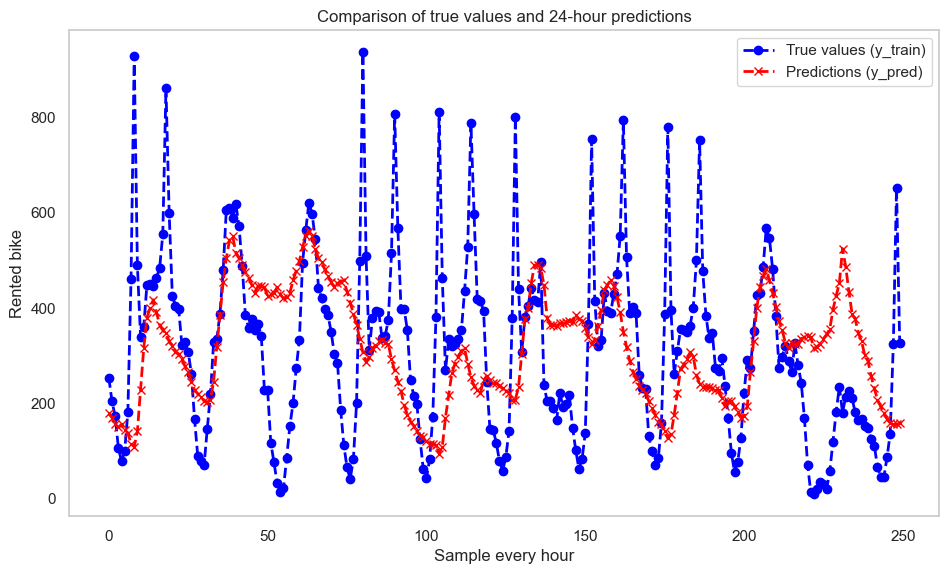

In [429]:
# Tracer les valeurs
plt.figure(figsize=(10, 6))
plt.plot( y[0:250], 'o', label='True values (y_train)', color='blue' ,linestyle='dashed',linewidth=2)
plt.plot(y_pred_1.predicted_mean[0:250], 'x', label='Predictions (y_pred)', color='red',linestyle='dashed',linewidth=2)

# Ajouter des légendes et des détails
plt.title('Comparison of true values and 24-hour predictions')
plt.xlabel('Sample every hour')
plt.ylabel('Rented bike')
plt.legend()
plt.grid()
plt.show()

We can clearly see that there is not only one feature that impact the number of rented bikes. But the model have see that there is a daily tendence.

## MULTIPLE REGRESSION MODELS AND FINDING THE FEATURE 

The purpuse now will be now to find the best feature to create the best model that would have the best forecast of the rented bike. First, we try to create a multilinear regression with all the feature. The model that we are going to implement will be use the Ordinary Least Squared Method (OLS) from the sklearn library.

### Train a multiple linear regression model

In [433]:
#First Test we try with the regular OLS with some variables of the data set to see if we have a better accuracy
# model before:
X = pd.DataFrame({'intercept': np.ones(df.shape[0]), 'temperature': df['temperature'], 'humidity' : df['humidity'], 'rain': df['rainfall'], 'hour' : df['hour'], 'weekday': df['weekday'] })
model_2pred = sm.OLS(y,X)
results_2pred = model_2pred.fit()
results_2pred.summary(model_2pred)
X

,intercept,temperature,humidity,rain,hour,weekday
0,1.0,-5.2,37,0.0,0,5
1,1.0,-5.5,38,0.0,1,5
2,1.0,-6.0,39,0.0,2,5
3,1.0,-6.2,40,0.0,3,5
4,1.0,-6.0,36,0.0,4,5
...,...,...,...,...,...,...
8755,1.0,4.2,34,0.0,19,5
8756,1.0,3.4,37,0.0,20,5
8757,1.0,2.6,39,0.0,21,5
8758,1.0,2.1,41,0.0,22,5


In [435]:
new_de2 = pd.DataFrame({'intercept': np.ones(3), 'temperature': [1,7,10], 'humidity' : [37,70,40], 'rain': [0,0,0], 'hour' : [19,8,7], 'weekday': [1,7,3] })
new_de2

,intercept,temperature,humidity,rain,hour,weekday
0,1.0,1,37,0,19,1
1,1.0,7,70,0,8,7
2,1.0,10,40,0,7,3


In [437]:
new_predictions = results_2pred.get_prediction(new_de2)
new_predictions.predicted_mean

array([734.67301278, 345.9482463 , 623.07121445])

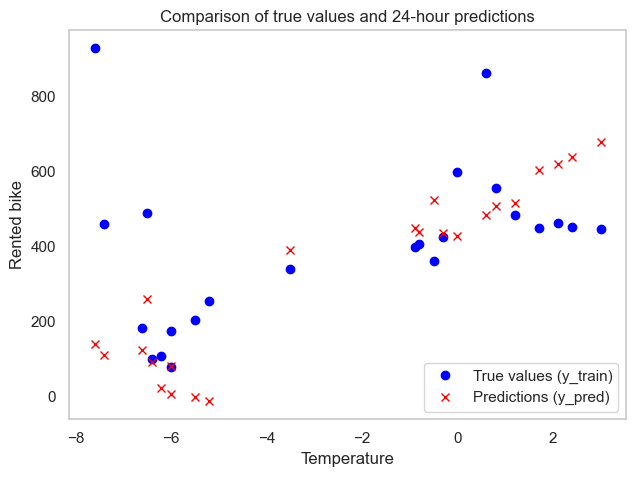

In [439]:
y_pred_1 = results_2pred.get_prediction(X)

# Tracer les valeurs
plt.figure()
plt.plot(X['temperature'][0:23], y[0:23], 'o', label='True values (y_train)', color='blue') #,linestyle='dashed',linewidth=2)
plt.plot(X['temperature'][0:23], y_pred_1.predicted_mean[0:23], 'x', label='Predictions (y_pred)', color='red')

# Ajouter des légendes et des détails
plt.title('Comparison of true values and 24-hour predictions')
plt.xlabel('Temperature')
plt.ylabel('Rented bike')
plt.legend()
plt.grid()
plt.show()

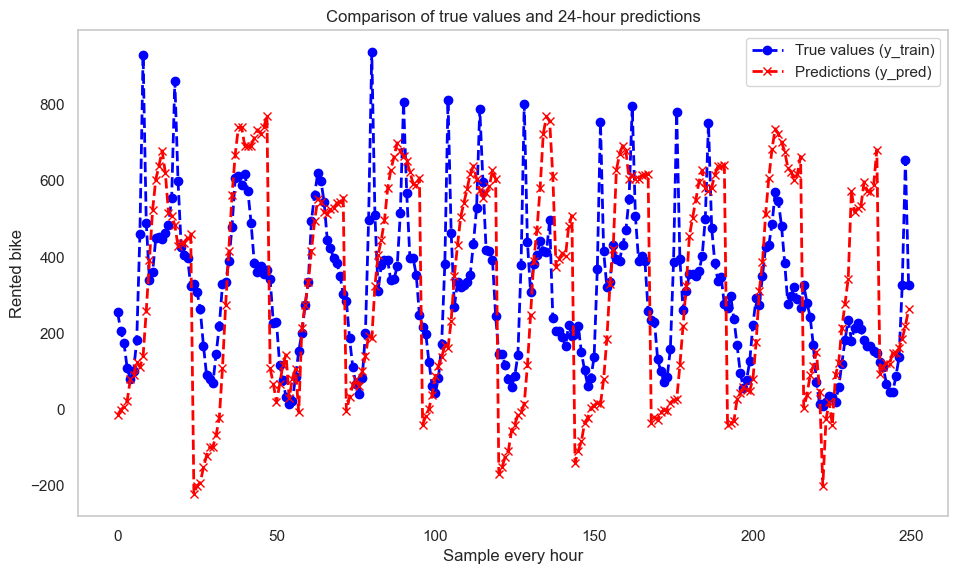

In [441]:
# Tracer les valeurs
plt.figure(figsize=(10, 6))
plt.plot( y[0:250], 'o', label='True values (y_train)', color='blue' ,linestyle='dashed',linewidth=2)
plt.plot(y_pred_1.predicted_mean[0:250], 'x', label='Predictions (y_pred)', color='red',linestyle='dashed',linewidth=2)

# Ajouter des légendes et des détails
plt.title('Comparison of true values and 24-hour predictions')
plt.xlabel('Sample every hour')
plt.ylabel('Rented bike')
plt.legend()
plt.grid()
plt.show()

We can see that the model is of better quality because it better interprets daily cycles. We can also see that it is getting closer and closer to the real values, but it is still not optimal. We also have a problem with this model, which is that due to linear regression it returns negative results, which poses a problem and cannot be realistic given that we are talking about bike hire.

## Finding the good features

In [49]:
# Train a multiple linear regression model with all variables 
# MODEL 1
data_1 = df.columns.drop(['rented_bike_count', 'date'])
X_1 = MS(data_1).fit_transform(df)
y_1 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_1 = sm.OLS(y_1, X_1)
results_1 = model_1.fit()
results_1.summary(model_1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                      OLS Regression Results                                                      
==================================================================================================================================
Dep. Variable:     <statsmodels.regression.linear_model.OLS object at 0x0000022DC4823320>   R-squared:                       0.487
Model:                                                                                OLS   Adj. R-squared:                  0.486
Method:                                                                     Least Squares   F-statistic:                     553.0
Date:                                                                    Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                                                                            17:08:47   Log-Likelihood:                -66178.
No. Observations:                                                                    8760   AIC:                         1.324e+05
Df Residuals:                                                                        8744   BIC:                         1.325e+05
Df Model:                                                                              15                                         
Covariance Type:                                                                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept              1.181e+06   1.49e+05      7.921      0.000    8.89e+05    1.47e+06
hour                     27.4141      0.778     35.228      0.000      25.889      28.940
temperature              24.4480      3.888      6.288      0.000      16.827      32.069
humidity                 -9.2005      1.100     -8.362      0.000     -11.357      -7.044
wind_speed               14.8383      5.448      2.724      0.006       4.159      25.518
visibility               -0.0035      0.011     -0.331      0.740      -0.024       0.017
dew_point_temperature     3.7032      4.084      0.907      0.365      -4.302      11.709
solar_radiation         -80.9207      8.120     -9.966      0.000     -96.837     -65.004
rainfall                -57.9896      4.566    -12.702      0.000     -66.939     -49.040
snowfall                 24.2322     12.049      2.011      0.044       0.612      47.852
seasons                 223.7551     20.145     11.107      0.000     184.266     263.244
holiday                -162.1877     23.036     -7.041      0.000    -207.343    -117.032
day                       0.2673      0.574      0.465      0.642      -0.858       1.393
month                   -52.8265      6.657     -7.936      0.000     -65.875     -39.778
year                   -585.0283     73.890     -7.918      0.000    -729.870    -440.187
weekday                 -10.6710      2.490     -4.286      0.000     -15.552      -5.790
==============================================================================
Omnibus:                      903.280   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1854.119
Skew:                           0.662   Prob(JB):                         0.00
Kurtosis:                       4.824   Cond. No.                     7.56e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Drop visibility, dew_point_temperature and day, because the variables have high p-values
# MODEL 2
data_2 = df.columns.drop(['rented_bike_count', 'date', 'visibility', 'dew_point_temperature', 'day'])
X_2 = MS(data_2).fit_transform(df)
y_2 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_2 = sm.OLS(y_2, X_2)
results_2 = model_2.fit()
results_2.summary(model_2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                      OLS Regression Results                                                      
==================================================================================================================================
Dep. Variable:     <statsmodels.regression.linear_model.OLS object at 0x0000022DC3A0E990>   R-squared:                       0.487
Model:                                                                                OLS   Adj. R-squared:                  0.486
Method:                                                                     Least Squares   F-statistic:                     691.3
Date:                                                                    Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                                                                            17:08:47   Log-Likelihood:                -66178.
No. Observations:                                                                    8760   AIC:                         1.324e+05
Df Residuals:                                                                        8747   BIC:                         1.325e+05
Df Model:                                                                              12                                         
Covariance Type:                                                                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept        1.184e+06   1.49e+05      7.944      0.000    8.92e+05    1.48e+06
hour               27.3975      0.774     35.386      0.000      25.880      28.915
temperature        27.9258      0.609     45.828      0.000      26.731      29.120
humidity           -8.2220      0.324    -25.408      0.000      -8.856      -7.588
wind_speed         14.4054      5.419      2.658      0.008       3.782      25.028
solar_radiation   -82.1607      7.674    -10.706      0.000     -97.204     -67.117
rainfall          -58.3904      4.532    -12.885      0.000     -67.273     -49.507
snowfall           24.2073     11.936      2.028      0.043       0.811      47.604
seasons           223.8438     20.110     11.131      0.000     184.423     263.264
holiday          -162.2725     23.032     -7.046      0.000    -207.421    -117.124
month             -52.9710      6.654     -7.960      0.000     -66.015     -39.927
year             -586.5457     73.866     -7.941      0.000    -731.340    -441.751
weekday           -10.8376      2.479     -4.371      0.000     -15.698      -5.978
==============================================================================
Omnibus:                      904.646   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.559
Skew:                           0.663   Prob(JB):                         0.00
Kurtosis:                       4.825   Cond. No.                     6.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# Compute the VIFs (Variance inflation factors)
vals = [VIF(X_2, i)  # Function vals with two arguments X: the dataframe or array and a variable column index
    for i in range(1, X_2.shape[1])] # Excluding the intercept value column 0 not being of interest
vif = pd.DataFrame({'vif':vals},
                  index=X_2.columns[1:])
vif 

,vif
hour,1.176829
temperature,2.170365
humidity,1.778653
wind_speed,1.292041
solar_radiation,1.820979
rainfall,1.070767
snowfall,1.113222
seasons,20.575350
holiday,1.018961
month,21.566357


In [52]:
# Drop month and year and train the linear regression model with seasons, as these features have high VIF values
# MODEL 3
data_3 = df.columns.drop(['rented_bike_count', 'date', 'visibility', 'dew_point_temperature', 'day', 'month', 'year'])
X_3 = MS(data_3).fit_transform(df)
y_3 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_3 = sm.OLS(y_3, X_3)
results_3 = model_3.fit()
results_3.summary(model_3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                      OLS Regression Results                                                      
==================================================================================================================================
Dep. Variable:     <statsmodels.regression.linear_model.OLS object at 0x0000022DC3897440>   R-squared:                       0.483
Model:                                                                                OLS   Adj. R-squared:                  0.482
Method:                                                                     Least Squares   F-statistic:                     817.3
Date:                                                                    Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                                                                            17:08:47   Log-Likelihood:                -66211.
No. Observations:                                                                    8760   AIC:                         1.324e+05
Df Residuals:                                                                        8749   BIC:                         1.325e+05
Df Model:                                                                              10                                         
Covariance Type:                                                                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept         471.1522     27.366     17.216      0.000     417.508     524.797
hour               27.4504      0.776     35.380      0.000      25.929      28.971
temperature        27.8527      0.605     46.029      0.000      26.667      29.039
humidity           -8.0572      0.324    -24.870      0.000      -8.692      -7.422
wind_speed         14.9624      5.429      2.756      0.006       4.320      25.605
solar_radiation   -79.2151      7.693    -10.297      0.000     -94.295     -64.135
rainfall          -59.6534      4.544    -13.127      0.000     -68.562     -50.745
snowfall           21.0892     11.861      1.778      0.075      -2.161      44.339
seasons            69.0659      5.644     12.237      0.000      58.002      80.130
holiday          -158.5755     22.992     -6.897      0.000    -203.646    -113.505
weekday           -10.3466      2.486     -4.162      0.000     -15.219      -5.474
==============================================================================
Omnibus:                      909.715   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1847.651
Skew:                           0.669   Prob(JB):                         0.00
Kurtosis:                       4.808   Cond. No.                         361.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Identifying significant features based on correlation
corr = df.corr()
features = corr["rented_bike_count"]
significant_features = features[features.abs() > 0.199]
significant_features

date                     0.340772
rented_bike_count        1.000000
hour                     0.410257
temperature              0.538558
humidity                -0.199780
visibility               0.199280
dew_point_temperature    0.379788
solar_radiation          0.261837
seasons                  0.359687
year                     0.215162
Name: rented_bike_count, dtype: float64

In [54]:
# Train a linear regression model with the following features based on the significant_features
# MODEL 4
data_4 = df.columns.drop(['rented_bike_count', 'date', 'wind_speed', 'rainfall', 'snowfall', 'holiday', 'day', 'month', 'weekday'])
X_4 = MS(data_4).fit_transform(df)
y_4 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_4 = sm.OLS(y_4, X_4)
results_4 = model_4.fit()
results_4.summary(model_4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                      OLS Regression Results                                                      
==================================================================================================================================
Dep. Variable:     <statsmodels.regression.linear_model.OLS object at 0x0000022DC3A0FF50>   R-squared:                       0.469
Model:                                                                                OLS   Adj. R-squared:                  0.469
Method:                                                                     Least Squares   F-statistic:                     966.3
Date:                                                                    Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                                                                            17:08:47   Log-Likelihood:                -66327.
No. Observations:                                                                    8760   AIC:                         1.327e+05
Df Residuals:                                                                        8751   BIC:                         1.327e+05
Df Model:                                                                               8                                         
Covariance Type:                                                                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept              2.536e+04   4.07e+04      0.623      0.533   -5.44e+04    1.05e+05
hour                     27.4908      0.766     35.888      0.000      25.989      28.992
temperature              18.0511      3.911      4.616      0.000      10.385      25.717
humidity                -11.3838      1.092    -10.425      0.000     -13.524      -9.243
visibility                0.0013      0.011      0.121      0.903      -0.019       0.022
dew_point_temperature    10.2635      4.099      2.504      0.012       2.229      18.298
solar_radiation         -71.0104      7.965     -8.915      0.000     -86.624     -55.397
seasons                  69.4535      5.981     11.612      0.000      57.729      81.178
year                    -12.2161     20.174     -0.606      0.545     -51.761      27.329
==============================================================================
Omnibus:                      908.709   Durbin-Watson:                   0.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1842.231
Skew:                           0.669   Prob(JB):                         0.00
Kurtosis:                       4.804   Cond. No.                     2.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Optimization of the linear regression model with interaction terms

In [56]:
# Train MODEL 4 with 6 linear interaction terms included (see interaction term tuples below)
# hour - temperature, hour - dew_point_temperature, hour - seasons, temperature - dew_point_temperature, temperature - seasons, hour - solar_radiation
# MODEL 5
data_5 = ['hour', 'temperature', 'humidity', 'visibility', 'dew_point_temperature', 'solar_radiation', 'seasons', 'year',
          ('hour','temperature'), ('hour','dew_point_temperature'), ('hour','seasons'), ('temperature','dew_point_temperature'),
          ('temperature','seasons'), ('hour','solar_radiation')]
X_5 = MS(data_5).fit_transform(df)
y_5 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_5 = sm.OLS(y_5, X_5)
results_5 = model_5.fit()
results_5.summary(model_5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                      OLS Regression Results                                                      
==================================================================================================================================
Dep. Variable:     <statsmodels.regression.linear_model.OLS object at 0x0000022DC3532F90>   R-squared:                       0.534
Model:                                                                                OLS   Adj. R-squared:                  0.533
Method:                                                                     Least Squares   F-statistic:                     715.6
Date:                                                                    Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                                                                            17:08:48   Log-Likelihood:                -65756.
No. Observations:                                                                    8760   AIC:                         1.315e+05
Df Residuals:                                                                        8745   BIC:                         1.316e+05
Df Model:                                                                              14                                         
Covariance Type:                                                                nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
intercept                          7.489e+04   3.92e+04      1.912      0.056   -1871.425    1.52e+05
hour                                -14.5929      1.862     -7.838      0.000     -18.243     -10.943
temperature                         -52.8879      5.164    -10.241      0.000     -63.011     -42.765
humidity                            -16.4264      1.068    -15.375      0.000     -18.521     -14.332
visibility                            0.0496      0.010      4.739      0.000       0.029       0.070
dew_point_temperature                69.3989      5.146     13.486      0.000      59.311      79.487
solar_radiation                     -30.5623     31.371     -0.974      0.330     -92.057      30.932
seasons                              53.6732     12.126      4.426      0.000      29.903      77.443
year                                -36.2962     19.407     -1.870      0.061     -74.337       1.745
hour:temperature                      4.3433      0.211     20.630      0.000       3.931       4.756
hour:dew_point_temperature           -2.4971      0.182    -13.707      0.000      -2.854      -2.140
hour:seasons                          1.8025      0.787      2.289      0.022       0.259       3.346
temperature:dew_point_temperature    -0.3224      0.045     -7.206      0.000      -0.410      -0.235
temperature:seasons                  -2.8558      0.725     -3.941      0.000      -4.276      -1.435
hour:solar_radiation                 -1.7248      2.447     -0.705      0.481      -6.521       3.072
==============================================================================
Omnibus:                      882.383   Durbin-Watson:                   0.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2586.995
Skew:                           0.542   Prob(JB):                         0.00
Kurtosis:                       5.431   Cond. No.                     2.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+07. This might indicate that there are
strong multicollinear

In [57]:
# Train MODEL 4 with 6 polynomial interaction terms included (see interaction term tuples below)
# hour - temperature, hour - dew_point_temperature, hour - seasons, temperature - dew_point_temperature, temperature - seasons, hour - solar_radiation
# MODEL 6
data_6 = ['hour', 'temperature', 'humidity', 'visibility', 'dew_point_temperature', 'solar_radiation', 'seasons', 'year']
X_6_df = df[data_6]
y_6 = df['rented_bike_count']

# PolynomialFeatures für alle Variablen mit Interaktionstermen und Quadraten (Grad 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_6_poly = poly.fit_transform(X_6_df)

# Namen der neuen Polynomial Features extrahieren und in DataFrame umwandeln
poly_feature_names = poly.get_feature_names_out(data_6)
X_6 = pd.DataFrame(X_6_poly, columns=poly_feature_names)

# Das erweiterte Modell mit OLS trainieren
X_6 = sm.add_constant(X_6)  # Konstante hinzufügen
model_6 = sm.OLS(y_6, X_6)
results_6 = model_6.fit()

# Modellzusammenfassung anzeigen
print(results_6.summary())

                            OLS Regression Results                            
Dep. Variable:      rented_bike_count   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     280.3
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:08:48   Log-Likelihood:                -65357.
No. Observations:                8760   AIC:                         1.308e+05
Df Residuals:                    8717   BIC:                         1.311e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## Training / Testing of the linear regression model with polynomial interactions

**MODEL 6** (8 features and multiple polynomial interaction terms) has the highest R^2 value, **the highest R^2 adjusted value** (takes into account the model complexity) and the lowest AIC value!\
But model 6 could lead to overfitting due to the many polynomial interaction terms.\
In the following we check the R^2 value of model 6 by splitting the training and testing data set.

In [60]:
# Splitting data_6 into training-dataset and test-dataset
X_train, X_test, y_train, y_test = train_test_split(X_6, y_6, test_size = 0.30, random_state = 1)

In [61]:
# Fitting training-dataset to model
model_6 = sm.OLS(y_6, X_6)
results_6 = LinearRegression().fit(X_train, y_train)

In [62]:
# Prediction of model
y_pred = results_6.predict(X_test)

In [63]:
# Training accuracy of model
results_6.score(X_train, y_train)

0.5767831877951517

In [64]:
# Test accuracy of model
results_6.score(X_test, y_test)

0.5656860235688055

In [65]:
# Print all the details 
print('MODEL 6 (Linear regression Model with 8 features and multiple polynomial interaction terms):')
print('----------------------------------------------------------------------------')
print('Model intercept: {}'
     .format(results_6.intercept_))
print('R-squared score (training): {:.3f}'
     .format(results_6.score(X_train, y_train)))
print('R-squared score (testing): {:.3f}'
     .format(results_6.score(X_test, y_test)))
print('----------------------------------------------------------------------------')
print('linear model coeff:\n{}'
     .format(results_6.coef_))

MODEL 6 (Linear regression Model with 8 features and multiple polynomial interaction terms):
----------------------------------------------------------------------------
Model intercept: -1785039.078249755
R-squared score (training): 0.577
R-squared score (testing): 0.566
----------------------------------------------------------------------------
linear model coeff:
[ 3.43689032e-03  7.86990829e+03  1.28723150e+05  4.36550429e+04
 -2.61714742e+02 -1.80426687e+05 -3.08572093e+05  1.70497108e-01
 -4.16798978e-02 -1.43598880e-01 -1.92400764e+00 -1.48219599e+00
  2.76500169e-03  3.93249994e+00  1.24693402e+01  4.77419436e-01
 -3.83857964e+00  2.31728482e+00 -1.00146517e+00 -2.84482666e-02
 -4.58795120e+00  1.13497286e+01  2.69769389e+00 -6.37732536e+01
 -4.05158334e-01 -5.34336105e-03  7.20638597e-01  1.08475282e+01
  7.91600324e-02 -2.16064085e+01 -2.20710079e-05  2.15035584e-02
  5.17559078e-02 -2.93848635e-03  1.29996139e-01  2.09976447e+00
 -2.31784078e+01 -2.36311666e+00  8.94112834e

## Compute predictions for rented_bike_count based on MODEL 4

In [67]:
# We use MODEL 4 to compute predictions for the rented_bike_count
data_4 = df.columns.drop(['rented_bike_count', 'date', 'wind_speed', 'rainfall', 'snowfall', 'holiday', 'day', 'month', 'weekday'])
design_4 = MS(data_4)
design_4 = design_4.fit(df)
x_4 = design_4.transform(df)
y_4 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_4 = sm.OLS(y_4, X_4)
results_4 = model_4.fit()
results_4.summary(model_4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                      OLS Regression Results                                                      
==================================================================================================================================
Dep. Variable:     <statsmodels.regression.linear_model.OLS object at 0x0000022DC4761E50>   R-squared:                       0.469
Model:                                                                                OLS   Adj. R-squared:                  0.469
Method:                                                                     Least Squares   F-statistic:                     966.3
Date:                                                                    Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                                                                            17:08:48   Log-Likelihood:                -66327.
No. Observations:                                                                    8760   AIC:                         1.327e+05
Df Residuals:                                                                        8751   BIC:                         1.327e+05
Df Model:                                                                               8                                         
Covariance Type:                                                                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept              2.536e+04   4.07e+04      0.623      0.533   -5.44e+04    1.05e+05
hour                     27.4908      0.766     35.888      0.000      25.989      28.992
temperature              18.0511      3.911      4.616      0.000      10.385      25.717
humidity                -11.3838      1.092    -10.425      0.000     -13.524      -9.243
visibility                0.0013      0.011      0.121      0.903      -0.019       0.022
dew_point_temperature    10.2635      4.099      2.504      0.012       2.229      18.298
solar_radiation         -71.0104      7.965     -8.915      0.000     -86.624     -55.397
seasons                  69.4535      5.981     11.612      0.000      57.729      81.178
year                    -12.2161     20.174     -0.606      0.545     -51.761      27.329
==============================================================================
Omnibus:                      908.709   Durbin-Watson:                   0.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1842.231
Skew:                           0.669   Prob(JB):                         0.00
Kurtosis:                       4.804   Cond. No.                     2.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# Create the data which we wish to make predictions and transform it to the model matrix
new_df = pd.DataFrame({
    'hour': [10, 15, 20],
    'temperature': [25.5, 18.0, 10.2],
    'humidity': [55, 70, 85],
    'visibility': [2000, 3000, 1500],
    'dew_point_temperature': [15.2, 12.5, 5.0],
    'solar_radiation': [0.7, 0.5, 0.2],
    'seasons': [2, 3, 1],
    'year': [2017, 2018, 2020]
})
prediction_df = design_4.transform(new_df)
prediction_df

,intercept,hour,temperature,humidity,visibility,dew_point_temperature,solar_radiation,seasons,year
0,1.0,10,25.5,55,2000,15.2,0.7,2,2017
1,1.0,15,18.0,70,3000,12.5,0.5,3,2018
2,1.0,20,10.2,85,1500,5.0,0.2,1,2020


In [69]:
# Getting the predictions 
new_predictions = results_4.get_prediction(prediction_df);
new_predictions.predicted_mean

array([1079.08203421,  955.39968714,  560.37317489])

In [70]:
# Predictions and confidence intervals
conf_int = pd.DataFrame(new_predictions.conf_int(alpha=0.05), columns=['confidence_low', 'confidence_high'])
predictions_df = pd.DataFrame({
    'predicted_mean': new_predictions.predicted_mean,
    'confidence_low': conf_int['confidence_low'].values,
    'confidence_high': conf_int['confidence_high'].values
})
predictions_df

,predicted_mean,confidence_low,confidence_high
0,1079.082034,1034.966589,1123.197480
1,955.399687,916.860197,993.939178
2,560.373175,465.660233,655.086117


## K NEAREST NEIGHBORS AND CROSS VALIDATION  

In [444]:
X = pd.DataFrame({'temperature': df['temperature'], 'humidity' : df['humidity'], 'hour' : df['hour'], 'visibility' : df['visibility'], 'dew_point_temperature' : df['dew_point_temperature'], 'solar_radiation' : df['solar_radiation'], 'seasons':df['seasons'],'year' : df['year'] })

The type date is compatible with KNN

In [447]:
X.head()

,temperature,humidity,hour,visibility,dew_point_temperature,solar_radiation,seasons,year
0,-5.2,37,0,2000,-17.6,0.0,0,2017
1,-5.5,38,1,2000,-17.6,0.0,0,2017
2,-6.0,39,2,2000,-17.7,0.0,0,2017
3,-6.2,40,3,2000,-17.6,0.0,0,2017
4,-6.0,36,4,2000,-18.6,0.0,0,2017


In [449]:
y = pd.DataFrame({ 'rented_bike_count': df['rented_bike_count']})
y.head()

,rented_bike_count
0,254
1,204
2,173
3,107
4,78


In [451]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state =7, train_size=0.75)

In [453]:
knn = KNeighborsRegressor(n_neighbors=7)

In [455]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [457]:
y_pred = knn.predict(X_val)
mse = mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
print ("The real model accuracy is: \n",r2) 

The real model accuracy is: 
 0.5544623968856592


In [459]:
m = r2
for k in range (2,200):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    
    if r2>=m :
        m=r2
        n=k
[m,n]

[0.5544623968856592, 7]

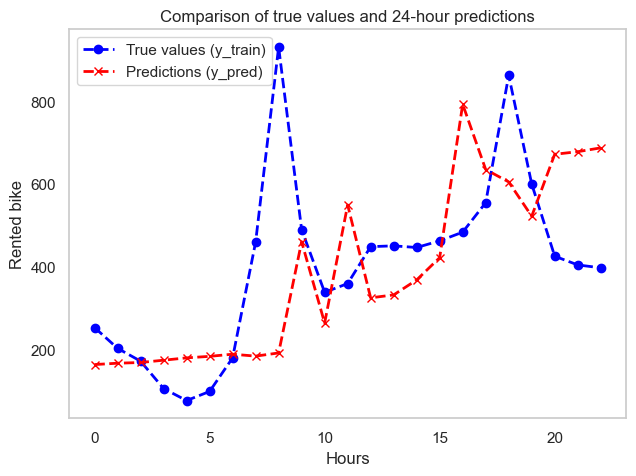

In [460]:
y_pred_train_1 = knn.predict(X)

#y_pred_train[0:23]
#y_train[0:23]

# Tracer les valeurs
plt.figure()
plt.plot(X['hour'][0:23], y[0:23], 'o', label='True values (y_train)', color='blue',linestyle='dashed',
     linewidth=2)
plt.plot(X['hour'][0:23], y_pred_train_1[0:23], 'x', label='Predictions (y_pred)', color='red',linestyle='dashed',
     linewidth=2)

# Ajouter des légendes et des détails
plt.title('Comparison of true values and 24-hour predictions')
plt.xlabel('Hours')
plt.ylabel('Rented bike')
plt.legend()
plt.grid()
plt.show()

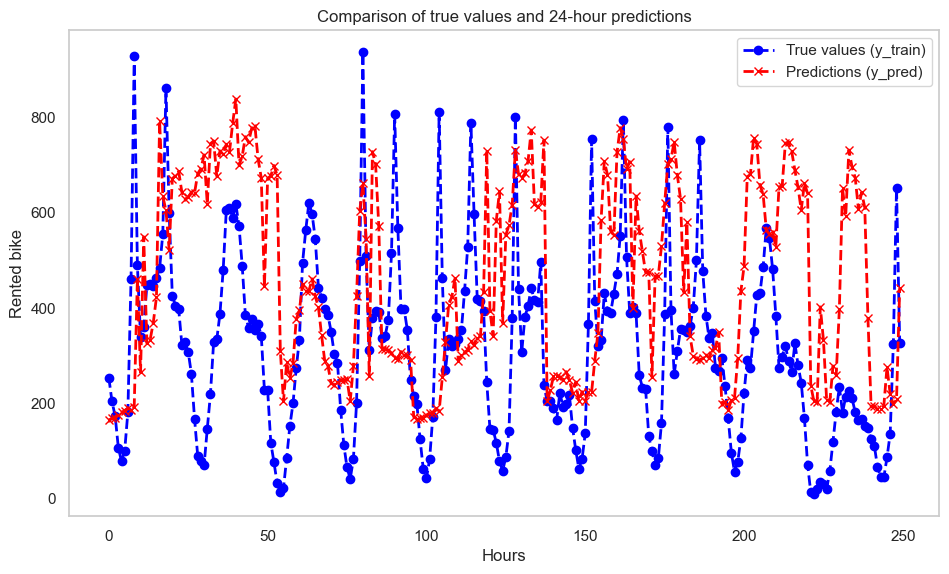

In [464]:
y_pred_train_1 = knn.predict(X)

#y_pred_train[0:23]
#y_train[0:23]

# Tracer les valeurs
plt.figure(figsize=(10, 6))
plt.plot(y[0:250], 'o', label='True values (y_train)', color='blue',linestyle='dashed',
     linewidth=2)
plt.plot(y_pred_train_1[0:250], 'x', label='Predictions (y_pred)', color='red',linestyle='dashed',
     linewidth=2)

# Ajouter des légendes et des détails
plt.title('Comparison of true values and 24-hour predictions')
plt.xlabel('Hours')
plt.ylabel('Rented bike')
plt.legend()
plt.grid()
plt.show()

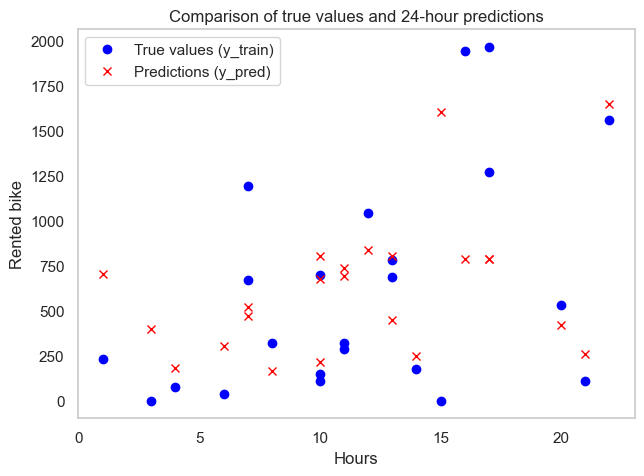

In [466]:
y_pred_train = knn.predict(X_train)

#y_pred_train[0:23]
#y_train[0:23]

# Tracer les valeurs
plt.figure()
plt.plot(X_train['hour'][0:23], y_train[0:23], 'o', label='True values (y_train)', color='blue')
plt.plot(X_train['hour'][0:23], y_pred_train[0:23], 'x', label='Predictions (y_pred)', color='red')

# Ajouter des légendes et des détails
plt.title('Comparison of true values and 24-hour predictions')
plt.xlabel('Hours')
plt.ylabel('Rented bike')
plt.legend()
plt.grid()
plt.show()

## LOGISTIC REGRESSION

In [ ]:
# Import necessary libraries for logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt

# Define a binary target variable (e.g., 1 if rentals > 500, else 0)
df['high_rentals'] = (df['rented_bike_count'] > 500).astype(int)

# Define features and target
X = df[['temperature', 'humidity', 'hour', 'seasons', 'holiday']]  # Add other relevant features
y = df['high_rentals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(logistic_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Logistic regression SALI

In [469]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [481]:
X = pd.DataFrame({'temperature': df['temperature'], 'humidity' : df['humidity'], 'hour' : df['hour'], 'visibility' : df['visibility'], 'dew_point_temperature' : df['dew_point_temperature'], 'solar_radiation' : df['solar_radiation'], 'seasons':df['seasons'],'year' : df['year'] })
#y = pd.DataFrame({ 'rented_bike_count': df['rented_bike_count']})
y = df['rented_bike_count']
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

logit_reg = LogisticRegression(penalty="l2", C=1, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print ("-------------------------------------------------------------------------")
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print ("-------------------------------------------------------------------------")
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))
print ("Accuracy of the trained model is:",logit_reg.score(train_X,train_y))  # calculate the mean accuracy of the model
print ("Accuracy of the test model is:",logit_reg.score(valid_X,valid_y))

intercept  -3.658723121285902e-05
-------------------------------------------------------------------------
       temperature  humidity      hour  visibility  dew_point_temperature  \
coeff    -0.065569 -0.015651 -0.006181    0.000023               0.063171   

       solar_radiation   seasons      year  
coeff          0.08553  1.210882 -0.002173  

-------------------------------------------------------------------------
AIC 57507.03844883309
Accuracy of the trained model is: 0.05974124809741248
Accuracy of the test model is: 0.032248858447488586


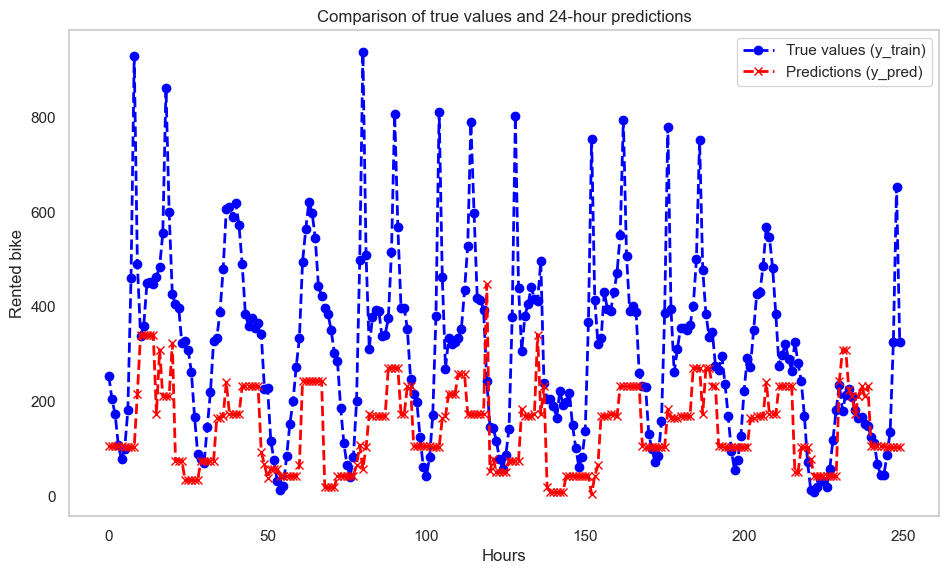

In [485]:
y_pred_train_1 = logit_reg.predict(X)

#y_pred_train[0:23]
#y_train[0:23]

# Tracer les valeurs
plt.figure(figsize=(10, 6))
plt.plot(y[0:250], 'o', label='True values (y_train)', color='blue',linestyle='dashed',
     linewidth=2)
plt.plot(y_pred_train_1[0:250], 'x', label='Predictions (y_pred)',color='red', linestyle='dashed',
     linewidth=2)

# Ajouter des légendes et des détails
plt.title('Comparison of true values and 24-hour predictions')
plt.xlabel('Hours')
plt.ylabel('Rented bike')
plt.legend()
plt.grid()
plt.show()

This model underestimate the rented bike number so that is bad for the company because they might want to know how many bikes will be rented but the good thing is that there are no more negatives values predicted.

In [508]:
X = pd.DataFrame({'temperature': df['temperature'], 'humidity' : df['humidity'], 'hour' : df['hour'], 'visibility' : df['visibility'], 'dew_point_temperature' : df['dew_point_temperature'], 'solar_radiation' : df['solar_radiation'], 'seasons':df['seasons'],'year' : df['year'] })
#y = pd.DataFrame({ 'rented_bike_count': df['rented_bike_count']})
y = df['rented_bike_count']
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

logit_reg = LogisticRegression(penalty="l2", C=100, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print ("-------------------------------------------------------------------------")
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print ("-------------------------------------------------------------------------")
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))
print ("Accuracy of the trained model is:",logit_reg.score(train_X,train_y))  # calculate the mean accuracy of the model
print ("Accuracy of the test model is:",logit_reg.score(valid_X,valid_y))

intercept  -3.6858507363628424e-05
-------------------------------------------------------------------------
       temperature  humidity      hour  visibility  dew_point_temperature  \
coeff    -0.065989 -0.015786 -0.006141    0.000021               0.063663   

       solar_radiation   seasons      year  
coeff          0.08614  1.220056 -0.002178  

-------------------------------------------------------------------------
AIC 57124.01683331483
Accuracy of the trained model is: 0.09341704718417047
Accuracy of the test model is: 0.030536529680365295


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


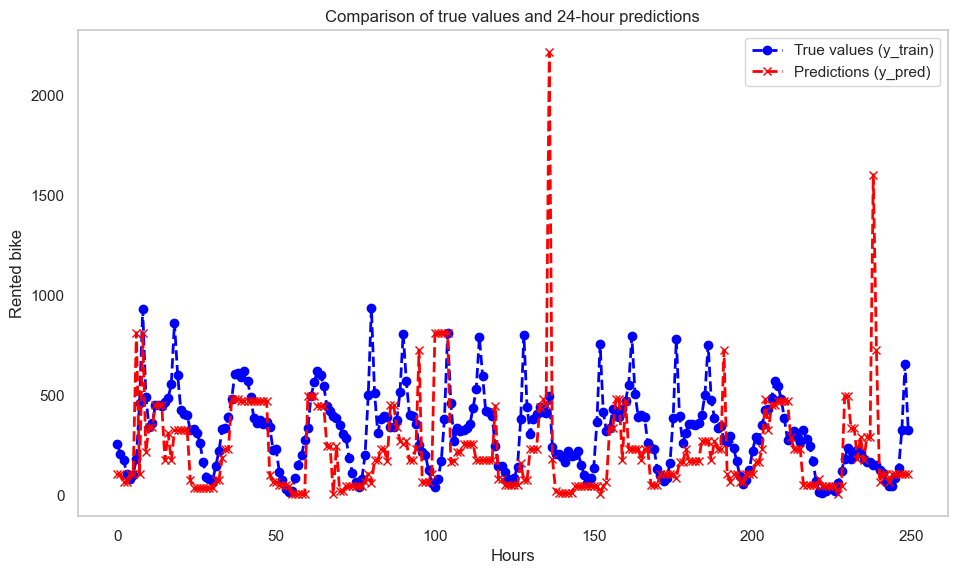

In [510]:
y_pred_train_1 = logit_reg.predict(X)

#y_pred_train[0:23]
#y_train[0:23]

# Tracer les valeurs
plt.figure(figsize=(10, 6))
plt.plot(y[0:250], 'o', label='True values (y_train)', color='blue',linestyle='dashed',
     linewidth=2)
plt.plot(y_pred_train_1[0:250], 'x', label='Predictions (y_pred)',color='red', linestyle='dashed',
     linewidth=2)

# Ajouter des légendes et des détails
plt.title('Comparison of true values and 24-hour predictions')
plt.xlabel('Hours')
plt.ylabel('Rented bike')
plt.legend()
plt.grid()
plt.show()

The good thing is that with this method we don't have any negative value thanks to the penalty also we can see the daily trend. We can see that thise model has understood the trends of peaks when people are taking the bikes to go and come back from work. But there are some very bad prediction with some outliers that overestimate the rented bike numbers.

In [495]:
#VERY LONG TIME
for k in range (1, 100):
    m=0.1
    n=0.03
    logit_reg = LogisticRegression(penalty="l2", C=k, solver='liblinear')
    logit_reg.fit(train_X, train_y)
    print ("Accuracy of the trained model is:",logit_reg.score(train_X,train_y))
    if logit_reg.score(train_X,train_y) >= n :
        m=k
        n=logit_reg.score(train_X,train_y)

Accuracy of the trained model is: 0.05974124809741248
Accuracy of the trained model is: 0.06430745814307458
Accuracy of the trained model is: 0.0671613394216134
Accuracy of the trained model is: 0.06830289193302892
Accuracy of the trained model is: 0.07058599695585997
Accuracy of the trained model is: 0.07191780821917808
Accuracy of the trained model is: 0.07401065449010655
Accuracy of the trained model is: 0.07553272450532725
Accuracy of the trained model is: 0.07591324200913242


KeyboardInterrupt: 